**Problem 1:**
Stratified Sampling Methods (Transportation)
Problem Statement:
A city transportation department wants to estimate the average daily traffic volume on a major highway. Due to resource constraints, they cannot count every vehicle and must use a sampling method. Design a stratified sampling approach to estimate the average daily vehicle count, considering weekdays and weekends as strata, and evaluate the precision of the estimate.
Scenario:
The highway has an expected daily traffic volume of approximately 20,000 vehicles on weekdays and 15,000 on weekends. The department collects data from 5 weekdays and 2 weekend days over a week, with a sample of 10 hours per day. The goal is to estimate the weekly average daily traffic volume using stratified sampling, accounting for the different traffic patterns.
Solution:
Stratified sampling divides the population into strata (weekdays and weekends) and samples proportionally or optimally from each. Here, we’ll assume equal sampling effort per stratum for simplicity and estimate the mean with a variance that accounts for stratum weights.

 Mean Daily Traffic: 17287.86 vehicles
Stratified Mean Daily Traffic: 18256.94 vehicles
Standard Error: 283.49 vehicles


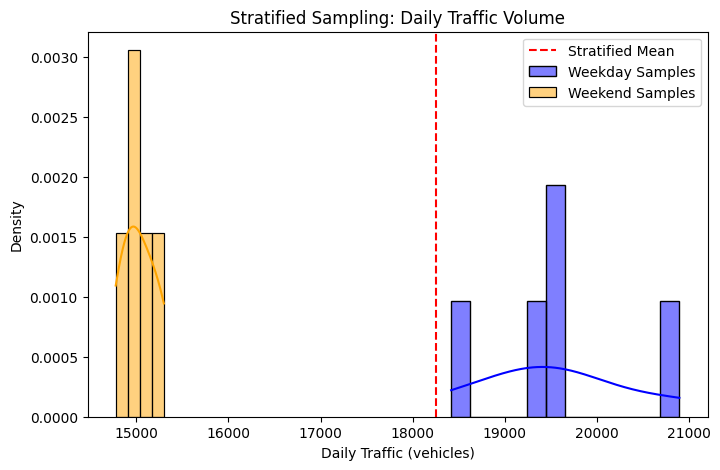

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Simulated data parameters
n_weekdays, n_weekends = 5, 2  # Days in a week
weekday_prop = n_weekdays / 7  # Proportion of weekdays
weekend_prop = n_weekends / 7  # Proportion of weekends
weekday_mean, weekday_std = 20000, 2000  # Weekday traffic (vehicles/day)
weekend_mean, weekend_std = 15000, 1500  # Weekend traffic (vehicles/day)
sample_hours = 10  # Hours sampled per day
n_samples_per_day = 5  # Number of days sampled per stratum

# Simulate hourly traffic data (assuming 24-hour day)
weekday_data = np.random.normal(weekday_mean/24, weekday_std/24, (n_samples_per_day, sample_hours))
weekend_data = np.random.normal(weekend_mean/24, weekend_std/24, (n_samples_per_day, sample_hours))

# Daily totals from samples
weekday_daily = weekday_data.sum(axis=1) * 24 / sample_hours
weekend_daily = weekend_data.sum(axis=1) * 24 / sample_hours

# Stratified mean
stratified_mean = weekday_prop * weekday_daily.mean() + weekend_prop * weekend_daily.mean()
sample_mean = .5 * weekday_daily.mean() + .5 * weekend_daily.mean()

# Stratified variance
var_weekday = weekday_daily.var(ddof=1) / n_samples_per_day
var_weekend = weekend_daily.var(ddof=1) / n_samples_per_day
stratified_var = (weekday_prop**2 * var_weekday) + (weekend_prop**2 * var_weekend)
stratified_se = np.sqrt(stratified_var)

# Results
print( f"Mean Daily Traffic: {sample_mean:.2f} vehicles")
print(f"Stratified Mean Daily Traffic: {stratified_mean:.2f} vehicles")
print(f"Standard Error: {stratified_se:.2f} vehicles")

# Visualization
plt.figure(figsize=(8, 5))
sns.histplot(weekday_daily, color='blue', label='Weekday Samples', kde=True, stat='density')
sns.histplot(weekend_daily, color='orange', label='Weekend Samples', kde=True, stat='density')
plt.axvline(stratified_mean, color='red', linestyle='--', label='Stratified Mean')
plt.title('Stratified Sampling: Daily Traffic Volume')
plt.xlabel('Daily Traffic (vehicles)')
plt.ylabel('Density')
plt.legend()
plt.show()


**Problem 2:** Cluster Sampling
Scenario (Transportation Planning Department)
A city wants to estimate the average daily traffic volume across all 120 signalized intersections.

Too expensive to count vehicles at every intersection.
Intersections are grouped into 12 neighborhoods (natural clusters).
Each neighborhood has 10 intersections → 12 clusters × 10 = 120 total.

Goal:
Estimate city-wide average daily traffic using cluster sampling.

Sampling Design
Step,Action
1,Treat each neighborhood as a cluster
2,Randomly select 3 clusters (neighborhoods)
3,Count all 10 intersections in each selected cluster
4,Estimate city-wide average

True City-Wide Average Daily Traffic: 3,959 vehicles

Selected Clusters: Cluster_10, Cluster_7, Cluster_12
  Cluster_10: 3,368 vehicles/day (n=10)
  Cluster_7: 5,194 vehicles/day (n=10)
  Cluster_12: 2,522 vehicles/day (n=10)

Cluster Estimate: 3,695 ± 713 vehicles/day

CLUSTER SAMPLING RESULTS
             Metric   Value
0    True City Mean  3959.0
1  Cluster Estimate  3695.0
2    Absolute Error   264.0
3    Standard Error   713.0


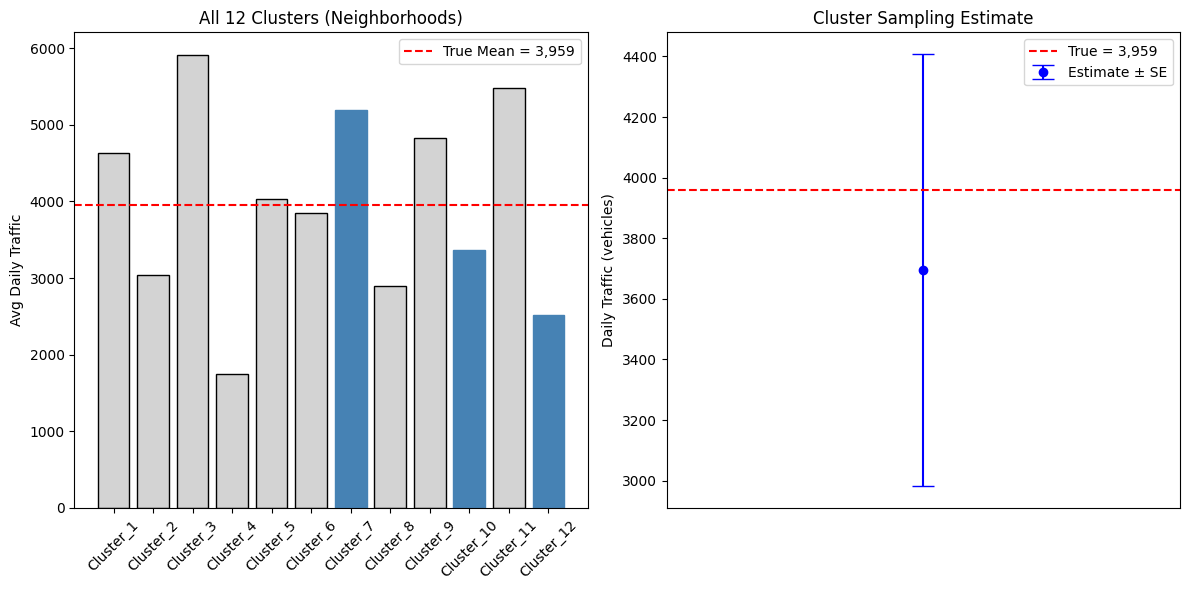

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed
np.random.seed(42)

# === 1. Define Clusters (12 neighborhoods) ===
np.random.seed(42)
cluster_names = [f'Cluster_{i+1}' for i in range(12)]
cluster_means = [4500, 3200, 6000, 1800, 4100, 3800, 5200, 2900, 4800, 3400, 5500, 2500]
cluster_stds = [300, 200, 400, 150, 250, 220, 350, 180, 320, 210, 380, 160]

clusters = {}
for name, mean, std in zip(cluster_names, cluster_means, cluster_stds):
    clusters[name] = np.random.normal(mean, std, 10).astype(int)

# True city-wide average
all_intersections = np.concatenate(list(clusters.values()))
true_city_mean = all_intersections.mean()

print(f"True City-Wide Average Daily Traffic: {true_city_mean:,.0f} vehicles\n")

# === 2. Cluster Sampling: Select 3 clusters ===
M = len(clusters)  # Total clusters = 12
m = 3              # Sampled clusters
selected_clusters = np.random.choice(cluster_names, m, replace=False)

print(f"Selected Clusters: {', '.join(selected_clusters)}")

# === 3. Compute cluster means and estimate ===
cluster_means_sample = []
for cluster in selected_clusters:
    mean = clusters[cluster].mean()
    cluster_means_sample.append(mean)
    print(f"  {cluster}: {mean:,.0f} vehicles/day (n=10)")

# Cluster sampling estimator
cluster_avg = np.mean(cluster_means_sample)
city_estimate = cluster_avg  # Since each cluster has same size

# === 4. Standard Error (Cluster Sampling) ===
# Variance between cluster means
between_var = np.var(cluster_means_sample, ddof=1)
se_between = np.sqrt(between_var / m)

# Finite Population Correction (FPC)
fpc = np.sqrt((M - m) / (M - 1))
se_city = se_between * fpc

print(f"\nCluster Estimate: {city_estimate:,.0f} ± {se_city:,.0f} vehicles/day")

# === 5. Results Summary ===
results = pd.DataFrame({
    'Metric': ['True City Mean', 'Cluster Estimate', 'Absolute Error', 'Standard Error'],
    'Value': [true_city_mean, city_estimate, abs(true_city_mean - city_estimate), se_city]
})
print("\n" + "="*60)
print("CLUSTER SAMPLING RESULTS")
print("="*60)
print(results.round(0))

# === 6. Visualization ===
plt.figure(figsize=(12, 6))

# Bar plot: All clusters
all_cluster_means = [clusters[c].mean() for c in cluster_names]
plt.subplot(1, 2, 1)
bars = plt.bar(cluster_names, all_cluster_means, color='lightgray', edgecolor='black')
# Highlight selected
for name in selected_clusters:
    idx = cluster_names.index(name)
    bars[idx].set_color('steelblue')
plt.axhline(true_city_mean, color='red', linestyle='--', label=f'True Mean = {true_city_mean:,.0f}')
plt.xticks(rotation=45)
plt.ylabel('Avg Daily Traffic')
plt.title('All 12 Clusters (Neighborhoods)')
plt.legend()

# Error bar plot
plt.subplot(1, 2, 2)
plt.errorbar(1, city_estimate, yerr=se_city, fmt='o', capsize=8, color='blue', label='Estimate ± SE')
plt.axhline(true_city_mean, color='red', linestyle='--', label=f'True = {true_city_mean:,.0f}')
plt.xlim(0.5, 1.5)
plt.xticks([])
plt.ylabel('Daily Traffic (vehicles)')
plt.title('Cluster Sampling Estimate')
plt.legend()

plt.tight_layout()
plt.show()

**Problem 3:** Central Limit Theorem (Construction)
Problem Statement:
A construction company measures the compressive strength of concrete samples from a batch used in bridge construction. The strength is known to follow a non-normal distribution (e.g., log-normal). Demonstrate the Central Limit Theorem (CLT) by showing that the distribution of sample means approaches normality as the sample size increases.
Scenario:
The concrete strength follows a log-normal distribution with parameters $ \mu = 3.2 $ (log-scale mean) and $ \sigma = 0.85 $ (log-scale standard deviation), corresponding to a mean strength of approximately 35.2 MPa. The company takes samples of sizes 5, 30, and 100 to verify that the mean strength meets the required 30 MPa. Use the CLT to show that the sample mean distribution becomes normal.
Solution:
The CLT states that the distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the population distribution. We’ll simulate samples, compute means, and visualize their distributions.

Population Mean: 35.21 MPa
Population Std Dev: 36.24 MPa



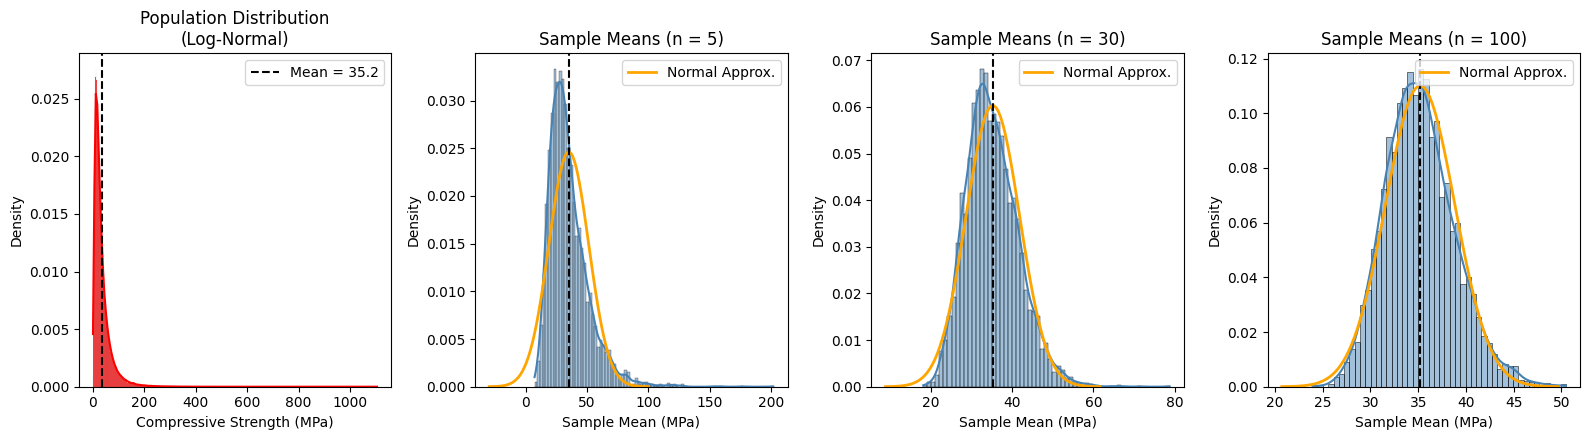


Standard Error of the Mean:
  n =   5 → SE = 16.21 MPa 
  n =  30 → SE = 6.62 MPa 
  n = 100 → SE = 3.62 MPa 
95% Confidence Intervals for Mean Strength (MPa)

n =   5 → Mean =  42.98 MPa,  CI = [ 11.21,  74.75] MPa
n =  30 → Mean =  40.89 MPa,  CI = [ 27.92,  53.85] MPa
n = 100 → Mean =  38.06 MPa,  CI = [ 30.95,  45.16] MPa


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm

# Set random seed for reproducibility
np.random.seed(42)

# Log-normal parameters (on log scale)
mu, sigma = 3.2, 0.85
scale = np.exp(mu)  # Scale parameter for lognorm

# Population statistics
pop_mean = np.exp(mu + sigma**2 / 2)
pop_var = (np.exp(sigma**2) - 1) * np.exp(2 * mu + sigma**2)
pop_std = np.sqrt(pop_var)

print(f"Population Mean: {pop_mean:.2f} MPa")
print(f"Population Std Dev: {pop_std:.2f} MPa\n")

# Simulation settings
n_samples = 5000  # Number of sample means to simulate
sample_sizes = [5, 30, 100]

# Generate population data for plotting (large sample)
population_data = lognorm.rvs(s=sigma, scale=scale, size=100000)

# Create subplots: 1 for population + 3 for sample means
fig, axes = plt.subplots(1, 4, figsize=(16, 4.5))

# --- Plot 1: Population (Log-Normal) ---
sns.histplot(population_data, kde=True, stat='density', color='red', alpha=0.7, ax=axes[0])
axes[0].set_title('Population Distribution\n(Log-Normal)')
axes[0].set_xlabel('Compressive Strength (MPa)')
axes[0].set_ylabel('Density')
axes[0].axvline(pop_mean, color='black', linestyle='--', label=f'Mean = {pop_mean:.1f}')
axes[0].legend()

# --- Plots 2–4: Sample Means ---
for i, n in enumerate(sample_sizes):
    # Generate n_samples means of size n
    sample_means = [lognorm.rvs(s=sigma, scale=scale, size=n).mean() for _ in range(n_samples)]

    ax = axes[i + 1]
    sns.histplot(sample_means, kde=True, stat='density', color='steelblue', ax=ax)

    # Theoretical normal approximation
    se = pop_std / np.sqrt(n)
    x = np.linspace(pop_mean - 4*se, pop_mean + 4*se, 100)
    normal_pdf = (1/(se * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - pop_mean)/se)**2)
    ax.plot(x, normal_pdf, color='orange', lw=2, label='Normal Approx.')

    ax.set_title(f'Sample Means (n = {n})')
    ax.set_xlabel('Sample Mean (MPa)')
    ax.set_ylabel('Density')
    ax.axvline(pop_mean, color='black', linestyle='--')
    ax.legend()

plt.tight_layout()
plt.show()

# Print standard errors
print("\nStandard Error of the Mean:")
for n in sample_sizes:
    se = pop_std / np.sqrt(n)
    print(f"  n = {n:3d} → SE = {se:.2f} MPa ")


# Print Confidence Intervals
print("95% Confidence Intervals for Mean Strength (MPa)\n")

for n in sample_sizes:
    # Generate sample
    sample = lognorm.rvs(s=sigma, scale=scale, size=n)

    # Sample statistics
    sample_mean = sample.mean()
    se = pop_std / np.sqrt(n)

    # z-critical value for 95% CI
    z_crit = 1.96

    # 95% CI using t-distribution
    ci_lower = sample_mean - z_crit * se
    ci_upper = sample_mean + z_crit * se

    # Print result
    print(f"n = {n:3d} → Mean = {sample_mean:6.2f} MPa,  CI = [{ci_lower:6.2f}, {ci_upper:6.2f}] MPa")

**Problem 4:** t-statistics:
An environmental agency monitors air quality by measuring PM2.5 concentrations (µg/m³) at a city monitoring station. Estimate the average PM2.5 concentration using a sample of measurements and provide a 95% confidence interval to assess whether the concentration exceeds the WHO guideline of 15 µg/m³.
Scenario:
A sample of 50 daily PM2.5 measurements is collected, assumed to follow a normal distribution with unknown mean and variance. The agency wants a point estimate (sample mean) and a 95% confidence interval to evaluate air quality.
Solution:
Use the sample mean as the point estimate and compute a 95% confidence interval using the t-distribution, given the unknown population variance.

t_crit:  2.0095752371292397
Point Estimate (Sample Mean): 18.87 µg/m³
95% Confidence Interval: (17.55, 20.20) µg/m³
Exceeds WHO guideline (15 µg/m³): Yes


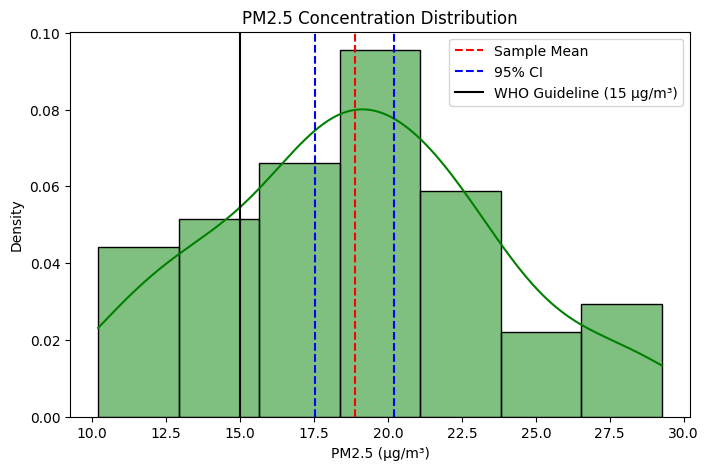

In [25]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed
np.random.seed(42)

# Simulated data (normal, mean=20, std=5)
n = 50
data = np.random.normal(20, 5, n)

# Point estimate
sample_mean = data.mean()
sample_std = data.std(ddof=1)
se = sample_std / np.sqrt(n)

# 95% confidence interval (t-distribution)
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=n-1)
ci_lower = sample_mean - t_crit * se
ci_upper = sample_mean + t_crit * se
print("t_crit: ", t_crit)

# Results
print(f"Point Estimate (Sample Mean): {sample_mean:.2f} µg/m³")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f}) µg/m³")
print(f"Exceeds WHO guideline (15 µg/m³): {'Yes' if ci_lower > 15 else 'No'}")

# Visualization
plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True, stat='density', color='green')
plt.axvline(sample_mean, color='red', linestyle='--', label='Sample Mean')
plt.axvline(ci_lower, color='blue', linestyle='--', label='95% CI')
plt.axvline(ci_upper, color='blue', linestyle='--')
plt.axvline(15, color='black', linestyle='-', label='WHO Guideline (15 µg/m³)')
plt.title('PM2.5 Concentration Distribution')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('Density')
plt.legend()
plt.show()

**Problem 5:** Chi-Square:
A construction company is casting concrete beams for a bridge. The compressive strength of concrete must have:

Mean ≥ 35 MPa
Coefficient of Variation (CV) ≤ 15% → i.e., standard deviation ≤ 0.15 × mean

They test 25 concrete cylinders from a single batch (standard practice per ASTM C39).
You are the quality control engineer.
Using the sample, estimate the population variance and determine:

Point estimate of variance
95% confidence interval for variance
Is the batch acceptable in terms of variability?

Sample Size: 25
Sample Mean: 36.96 MPa
Sample Std Dev: 1.80 MPa
Sample Variance: 3.22 MPa²
Coefficient of Variation: 0.049 (4.9%)

95% CI for Population Variance: [1.97, 6.24] MPa²
95% CI for Population Std Dev: [1.40, 2.50] MPa

Max Allowed Std Dev (CV ≤ 15%): 5.54 MPa
Batch Variability: PASS


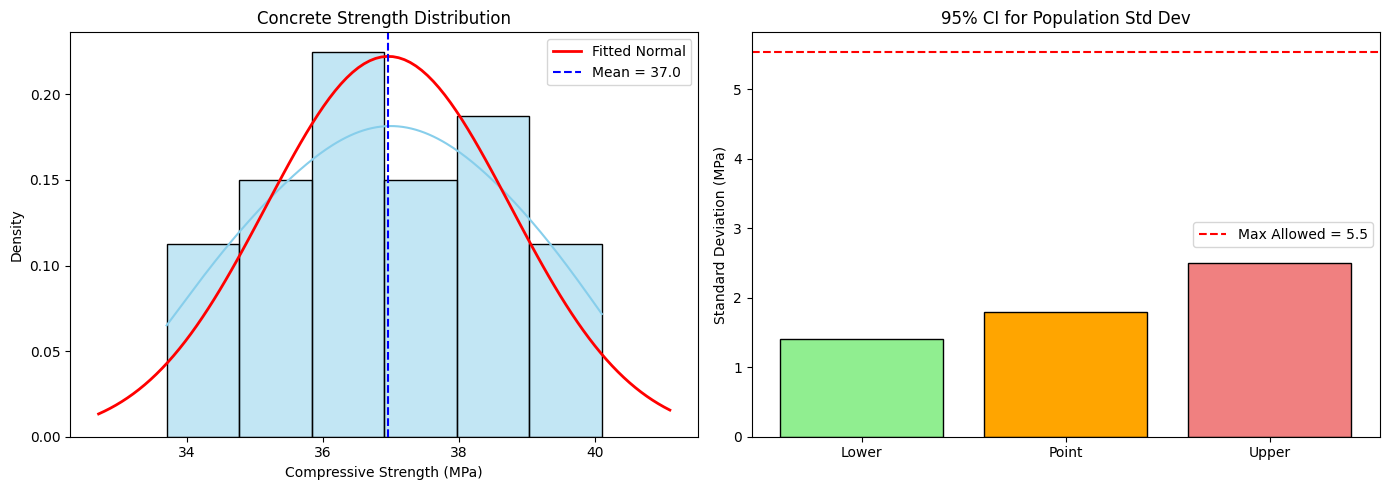

In [ ]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = np.array([
    38.2, 36.1, 34.8, 39.5, 37.3, 35.9, 40.1, 33.7, 36.8, 37.9,
    34.5, 38.8, 36.4, 35.2, 39.0, 37.6, 34.1, 38.5, 36.9, 35.7,
    39.8, 37.2, 35.4, 38.0, 36.6
])

n = len(data)
df = n - 1
sample_mean = data.mean()
sample_var = data.var(ddof=1)  # Unbiased variance
sample_std = np.sqrt(sample_var)
cv = sample_std / sample_mean

print(f"Sample Size: {n}")
print(f"Sample Mean: {sample_mean:.2f} MPa")
print(f"Sample Std Dev: {sample_std:.2f} MPa")
print(f"Sample Variance: {sample_var:.2f} MPa²")
print(f"Coefficient of Variation: {cv:.3f} ({cv*100:.1f}%)")

# Chi-square 95% CI for variance
alpha = 0.05
chi2_lower = chi2.ppf(alpha/2, df)
chi2_upper = chi2.ppf(1 - alpha/2, df)

var_ci_lower = (df * sample_var) / chi2_upper
var_ci_upper = (df * sample_var) / chi2_lower
std_ci_lower = np.sqrt(var_ci_lower)
std_ci_upper = np.sqrt(var_ci_upper)

print(f"\n95% CI for Population Variance: [{var_ci_lower:.2f}, {var_ci_upper:.2f}] MPa²")
print(f"95% CI for Population Std Dev: [{std_ci_lower:.2f}, {std_ci_upper:.2f}] MPa")

# Required: CV ≤ 15% → σ ≤ 0.15 * mean
max_allowed_std = 0.15 * sample_mean
print(f"\nMax Allowed Std Dev (CV ≤ 15%): {max_allowed_std:.2f} MPa")

# Decision
if std_ci_upper <= max_allowed_std:
    decision = "PASS"
elif std_ci_lower > max_allowed_std:
    decision = "FAIL"
else:
    decision = "UNCERTAIN (CI overlaps threshold)"

print(f"Batch Variability: {decision}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram + Normal Curve
sns.histplot(data, kde=True, stat='density', ax=ax1, color='skyblue')
x = np.linspace(data.min()-1, data.max()+1, 100)
from scipy.stats import norm
ax1.plot(x, norm.pdf(x, sample_mean, sample_std), 'r-', lw=2, label='Fitted Normal')
ax1.axvline(sample_mean, color='blue', linestyle='--', label=f'Mean = {sample_mean:.1f}')
ax1.set_title('Concrete Strength Distribution')
ax1.set_xlabel('Compressive Strength (MPa)')
ax1.legend()

# CI for Std Dev
ax2.bar(['Lower', 'Point', 'Upper'], [std_ci_lower, sample_std, std_ci_upper],
        color=['lightgreen', 'orange', 'lightcoral'], edgecolor='black')
ax2.axhline(max_allowed_std, color='red', linestyle='--', label=f'Max Allowed = {max_allowed_std:.1f}')
ax2.set_ylabel('Standard Deviation (MPa)')
ax2.set_title('95% CI for Population Std Dev')
ax2.legend()

plt.tight_layout()
plt.show()